## In this datasetwe have to predict the income ofpeoplethat they earn more than 50kor less than 50kredict 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df=pd.read_csv('census_income.csv',sep=',\s')
df.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

df

age         workclass  fnlwgt   education  education_num  \
0       50  Self-emp-not-inc   83311   Bachelors             13   
1       38           Private  215646     HS-grad              9   
2       53           Private  234721        11th              7   
3       28           Private  338409   Bachelors             13   
4       37           Private  284582     Masters             14   
...    ...               ...     ...         ...            ...   
32555   27           Private  257302  Assoc-acdm             12   
32556   40           Private  154374     HS-grad              9   
32557   58           Private  151910     HS-grad              9   
32558   22           Private  201490     HS-grad              9   
32559   52      Self-emp-inc  287927     HS-grad              9   

           marital_status         occupation   relationship   race     sex  \
0      Married-civ-spouse    Exec-managerial        Husband  White    Male   
1                Divorced  Handlers-cleaners  Not-in-family  White    Male   
2      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4      Married-civ-spouse    Exec-managerial           Wife  White  Female   
...                   ...                ...            ...    ...     ...   
32555  Married-civ-spouse       Tech-support           Wife  White  Female   
32556  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32557             Widowed       Adm-clerical      Unmarried  White  Female   
32558       Never-married       Adm-clerical      Own-child  White    Male   
32559  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital_gain  capital_loss  hours_per_week native_country income  
0                 0             0              13  United-States  <=50K  
1                 0             0              40  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40           Cuba  <=50K  
4                 0             0              40  United-States  <=50K  
...             ...           ...             ...            ...    ...  
32555             0             0              38  United-States  <=50K  
32556             0             0              40  United-States   >50K  
32557             0             0              40  United-States  <=50K  
32558             0             0              20  United-States  <=50K  
32559         15024             0              40  United-States   >50K  

[32560 rows x 15 columns]

In [3]:
df.shape

(32560, 15)

This dataset contains 32561 rows & 15 columns

In [4]:
#checking for null values
df.isnull().values.any()

False

Observation

  Here we see that there are no null values butthere is a '?' present in our dataset which is treated as null value

In [5]:
#checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observation:-
    
    Information of the dataset shows that there are no missing values.But in our dataset '?'' is present.So I will encode '?' as NaN value

In [6]:
#replacing the ? with nan value
df[df == '?'] = np.nan

In [7]:
#checking for null values again
df.isnull().values.any()

True

Now it tells that nan value is present

Now we check no. of null values present in particular column

In [8]:
#checking for no. of null values

df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Observation:-
    
1.There are 1836 null values present in workclass column

2.1843 null values are present in occupation column

3.583 null values are present in native_country column

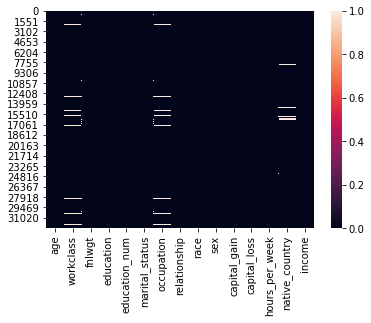

In [9]:
#visualisation

sns.heatmap(df.isnull())

In [10]:
#checking the information of the column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observation:-
    
    The summary shows that the variable-workclass,occupation & native_country contains missing values
    
    All of these variables are categorical data type .So I will impute the missing values with the         most frequent value .ie mode

In [11]:
#imputing the missing values with mode

for col in ['workclass','occupation','native_country']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [12]:
#now again checking for missing values

df.isnull().values.any()

False

Now our null values is removed.We can see it via visualisation

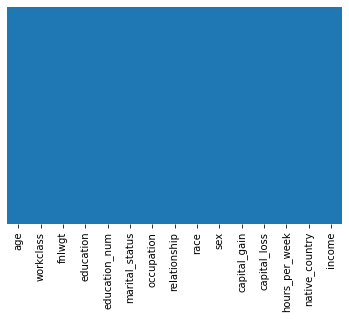

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20')

# Now our data is ready for visualization without any missing data

In [14]:
#putting tha data into pandas dataframe
df=pd.DataFrame(df)
df.head()

age         workclass  fnlwgt  education  education_num  \
0   50  Self-emp-not-inc   83311  Bachelors             13   
1   38           Private  215646    HS-grad              9   
2   53           Private  234721       11th              7   
3   28           Private  338409  Bachelors             13   
4   37           Private  284582    Masters             14   

       marital_status         occupation   relationship   race     sex  \
0  Married-civ-spouse    Exec-managerial        Husband  White    Male   
1            Divorced  Handlers-cleaners  Not-in-family  White    Male   
2  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4  Married-civ-spouse    Exec-managerial           Wife  White  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0             0             0              13  United-States  <=50K  
1             0             0              40  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40           Cuba  <=50K  
4             0             0              40  United-States  <=50K

In [15]:
#checking the datatypes of the columns
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [16]:
df.columns.groupby(df.dtypes)

{dtype('int64'): Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
        'hours_per_week'],
       dtype='object'),
 dtype('O'): Index(['workclass', 'education', 'marital_status', 'occupation',
        'relationship', 'race', 'sex', 'native_country', 'income'],
       dtype='object')}

# For analyzing the data with Target .ie Income we have to change income into numeric types

In [17]:
df.income

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32555    <=50K
32556     >50K
32557    <=50K
32558    <=50K
32559     >50K
Name: income, Length: 32560, dtype: object

In [18]:
#changing the datatype of target column
df['income']=df['income'].map({'<=50K':0,'>50K':1})

In [19]:
df['income'].unique()

array([0, 1], dtype=int64)

Observation

Here 1 stands for greater than 50K & 0 stand sfor less than or equal t0 50k

# Summary Statistics

In [20]:
df.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week        income  
count    32560.000000  32560.000000  
mean        40.437469      0.240817  
std         12.347618      0.427586  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000      0.000000  
75%         45.000000      0.000000  
max         99.000000      1.000000

Observation:-
    
    1.Minmum age is 17 & maximum age is 90 in our dataset
    
    2.minimum education_num is 1 & amximum is 16

# Exploring Data Variables

In [21]:
#printing objects datatypes & their unique values

for col in df.columns:
    if df[col].dtype==object:
        print(str(col) +':'+str(df[col].unique()))
        print(df[col].value_counts())
        print('******************************************************************************')
        print('\n')

workclass:['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
******************************************************************************


education:['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: 

Here we see the summary of categorical column

# check correlation

In [22]:
df.corr()

age    fnlwgt  education_num  capital_gain  capital_loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043159      0.000437     -0.010259   
education_num   0.036527 -0.043159       1.000000      0.122627      0.079932   
capital_gain    0.077674  0.000437       0.122627      1.000000     -0.031614   
capital_loss    0.057775 -0.010259       0.079932     -0.031614      1.000000   
hours_per_week  0.068756 -0.018770       0.148127      0.078409      0.054256   
income          0.234039 -0.009481       0.335182      0.223333      0.150523   

                hours_per_week    income  
age                   0.068756  0.234039  
fnlwgt               -0.018770 -0.009481  
education_num         0.148127  0.335182  
capital_gain          0.078409  0.223333  
capital_loss          0.054256  0.150523  
hours_per_week        1.000000  0.229690  
income                0.229690  1.000000

here we see corelation between columns

For better clarity ,we can see it via visualization with the help of heatmap

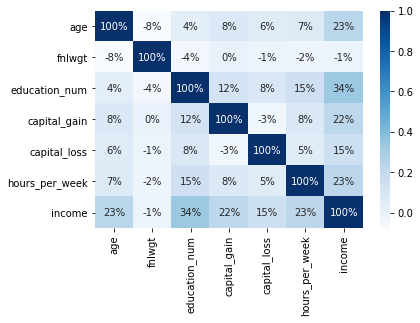

In [23]:
sns.heatmap(df.corr(),fmt='.0%',cmap='Blues',annot=True)

Text(0.5, 1.0, 'correlation with target variable')

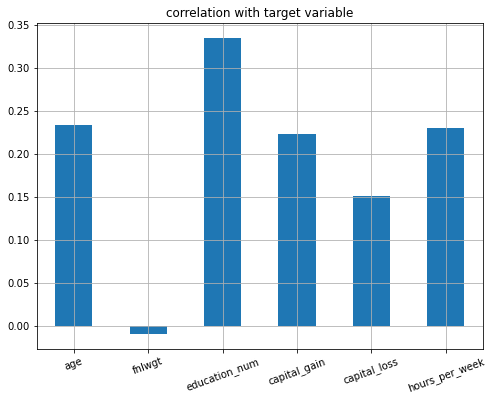

In [24]:
plt.figure(figsize=(8,6))
df.drop('income',axis=1).corrwith(df['income']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('correlation with target variable')

Observation:
    
    1.fnlwgt is only negatively correlated with target variable income
    
    2.education_num is highly correlated with target variable among all input variables

# Data Visualization

1 stands for > 50k & 0 stands for <=50k

# Univariate analysis

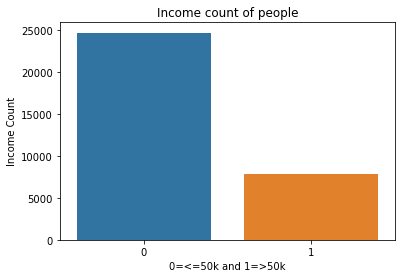

0    24719
1     7841
Name: income, dtype: int64


In [25]:
#checking income count of people

plt.subplots(figsize=(6,4))
sns.countplot(x='income',data=df)
plt.title('Income count of people')
plt.xlabel('0=<=50k and 1=>50k')
plt.ylabel('Income Count')
plt.show()

print(df['income'].value_counts())

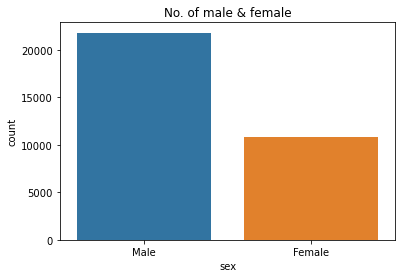

Male      21789
Female    10771
Name: sex, dtype: int64


In [26]:
#checking no. of male & female
plt.subplots(figsize=(6,4))
sns.countplot(x='sex',data=df)
plt.title('No. of male & female')
plt.show()

print(df.sex.value_counts())

Observation:
    
    There are 21789 male & 10771 female

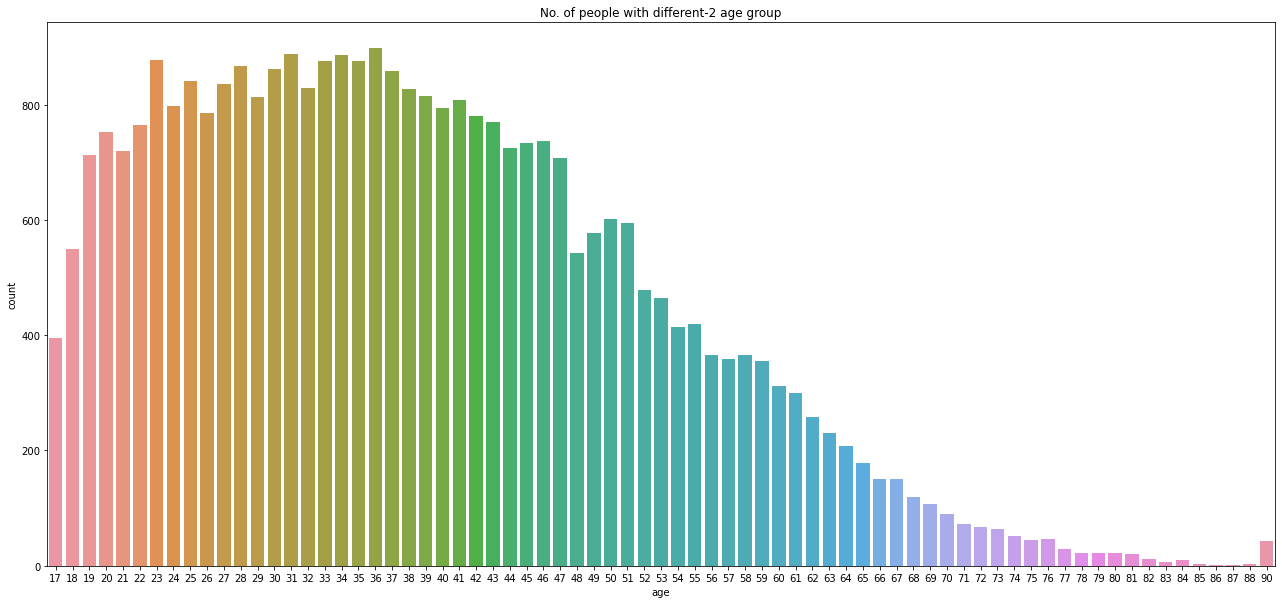

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64


In [27]:
#checking no. of people with different different age group
plt.subplots(figsize=(22,10))
sns.countplot(x='age',data=df)
plt.title('No. of people with different-2 age group')
plt.show()

print(df.age.value_counts())

Observation:
    
    1.Maxm people is of age 36years .ie 898
    2.Only 1 people is of age 86 & 87 years
    3.There are 43 people of age 90 years which is the hightest age group of our dataset

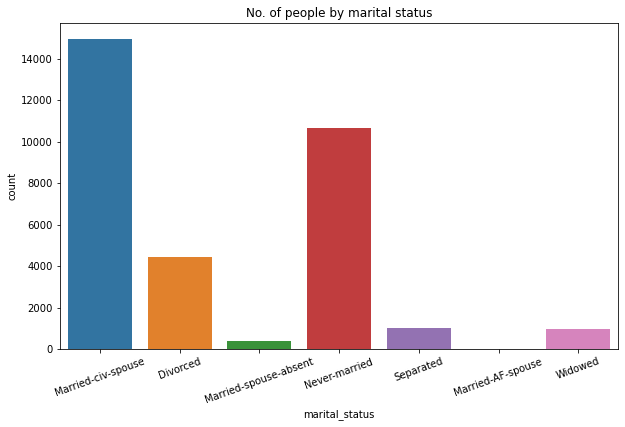

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64


In [28]:
#Marital status f people
plt.figure(figsize=(10,6))
sns.countplot(x='marital_status',data=df)
plt.title('No. of people by marital status')
plt.xticks(rotation=20)
plt.show()

print(df.marital_status.value_counts())

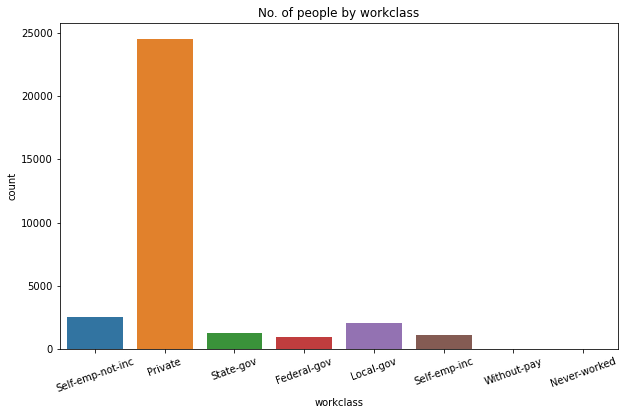

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


In [29]:
#workclass of people

plt.figure(figsize=(10,6))
sns.countplot(x='workclass',data=df)
plt.title('No. of people by workclass')
plt.xticks(rotation=20)
plt.show()

print(df.workclass.value_counts())

Findings;

Above are the workplace of people

24532 people is doing job in private sector & 7 people never worked

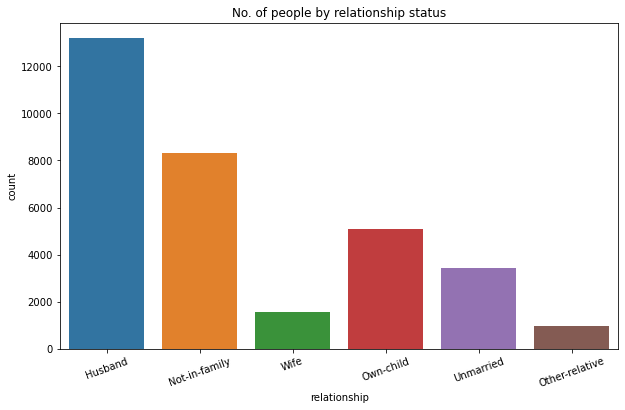

Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


In [30]:
#relationship status of people
plt.figure(figsize=(10,6))
sns.countplot(x='relationship',data=df)
plt.title('No. of people by relationship status')
plt.xticks(rotation=20)
plt.show()

print(df.relationship.value_counts())

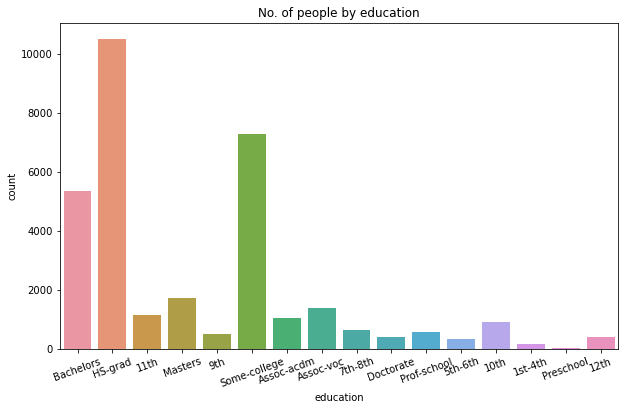

HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


In [31]:
#checking the no. of people by education
plt.figure(figsize=(10,6))
sns.countplot(x='education',data=df)
plt.title('No. of people by education')
plt.xticks(rotation=20)
plt.show()

print(df.education.value_counts())

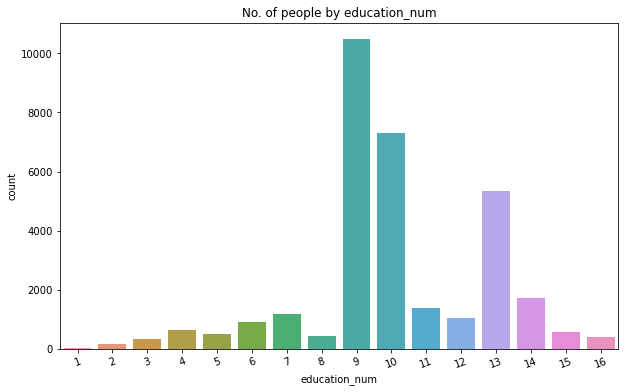

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64


In [32]:
#checking the no. of people by education number
plt.figure(figsize=(10,6))
sns.countplot(x='education_num',data=df)
plt.title('No. of people by education_num')
plt.xticks(rotation=20)
plt.show()

print(df.education_num.value_counts())

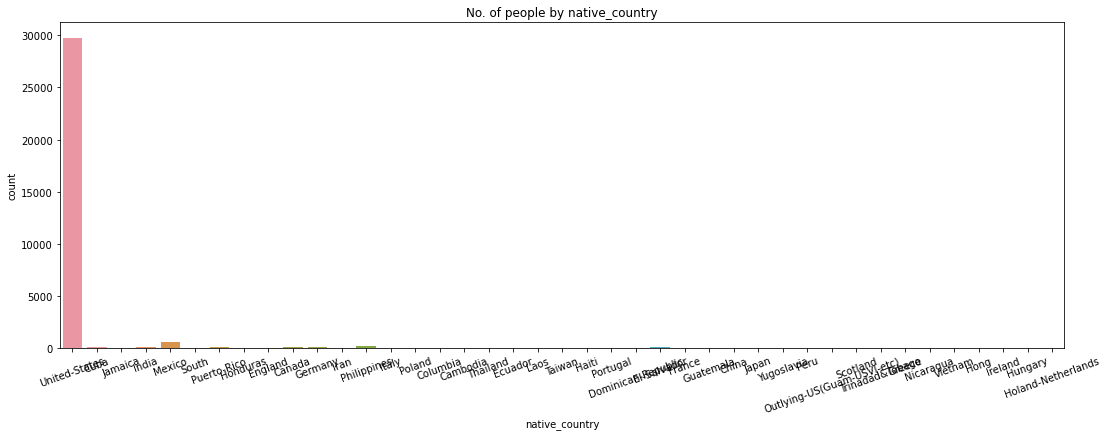

United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [33]:
#checking the no. of people by native_country
plt.figure(figsize=(18,6))
sns.countplot(x='native_country',data=df)
plt.title('No. of people by native_country')
plt.xticks(rotation=20)
plt.show()

print(df.native_country.value_counts())

oBservation:
    
    Here the maxm people is fron USA & only 1 people is from Holand-netherland

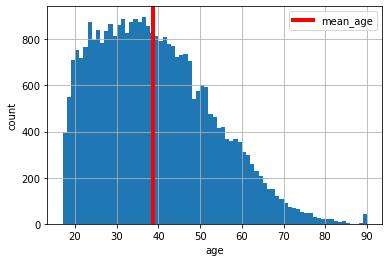

In [34]:
#checking the mean of age-group

ages=df['age'].hist(bins=max(df['age']-min(df['age'])))
mean_val=np.mean(df['age'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean_age')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

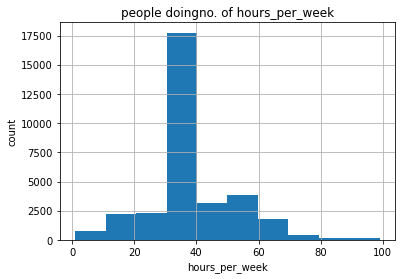

In [35]:
#checking no. of hours per week

df['hours_per_week'].hist()
plt.xlabel('hours_per_week')
plt.ylabel('count')
plt.title('people doingno. of hours_per_week')
plt.show()

Findings:
    
    Approx 17500 people are doing 30-40
    - hours per week

# Bivariate Analysis

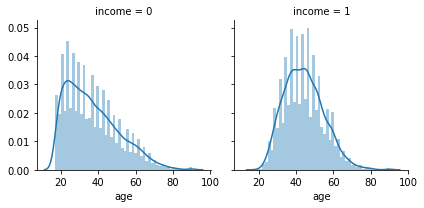

In [36]:
#exploring age vs income via facegrid
facet=sns.FacetGrid(df,col='income')
facet.map(sns.distplot,'age')
plt.show()

# sex vs income

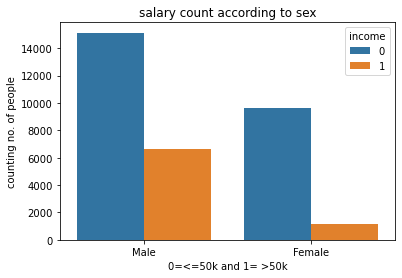

sex     income
Female  0          9592
        1          1179
Male    0         15127
        1          6662
Name: income, dtype: int64


In [37]:

sns.countplot(x='sex',hue='income',data=df)
plt.title('salary count according to sex')
plt.xlabel('0=<=50k and 1= >50k')
plt.ylabel('counting no. of people')
plt.show()

print(df.groupby('sex')['income'].value_counts())

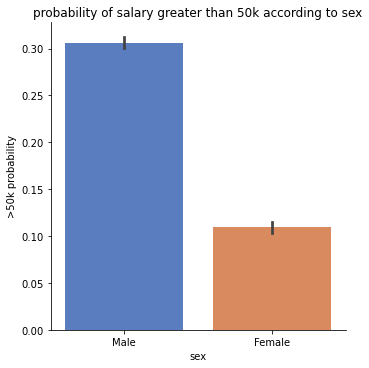

In [38]:
#factor plot of sex vs income
sns.factorplot(x='sex',y='income',data=df,kind='bar',palette='muted',aspect=1)
plt.title('probability of salary greater than 50k according to sex')
plt.ylabel('>50k probability')
plt.show()

Findings :
    
    Only 30% male & 11% female got salary more than 50k

# Education vs Income

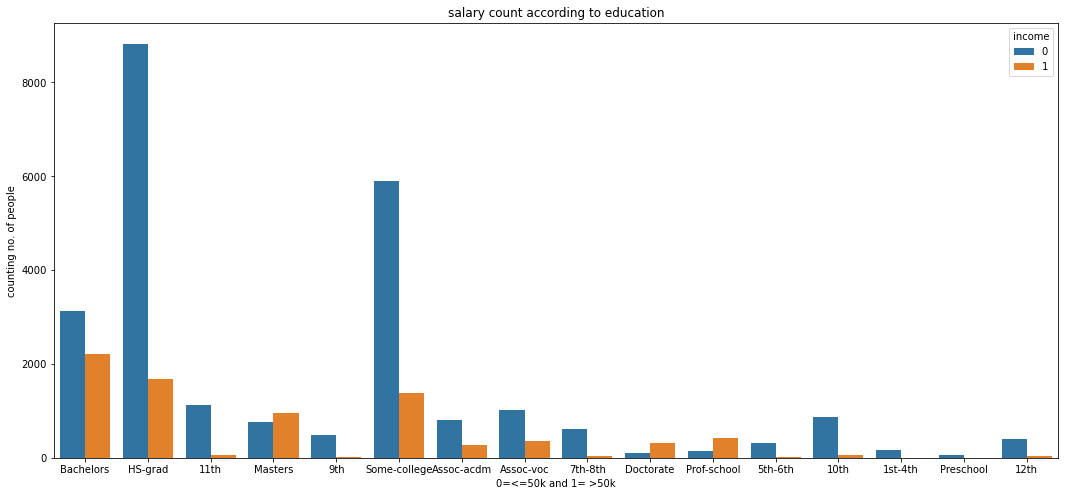

education     income
10th          0          871
              1           62
11th          0         1115
              1           60
12th          0          400
              1           33
1st-4th       0          162
              1            6
5th-6th       0          317
              1           16
7th-8th       0          606
              1           40
9th           0          487
              1           27
Assoc-acdm    0          802
              1          265
Assoc-voc     0         1021
              1          361
Bachelors     0         3133
              1         2221
Doctorate     1          306
              0          107
HS-grad       0         8826
              1         1675
Masters       1          959
              0          764
Preschool     0           51
Prof-school   1          423
              0          153
Some-college  0         5904
              1         1387
Name: income, dtype: int64


In [39]:
plt.subplots(figsize=(18,8))
sns.countplot(x='education',hue='income',data=df)
plt.title('salary count according to education')
plt.xlabel('0=<=50k and 1= >50k')
plt.ylabel('counting no. of people')
plt.show()

print(df.groupby('education')['income'].value_counts())

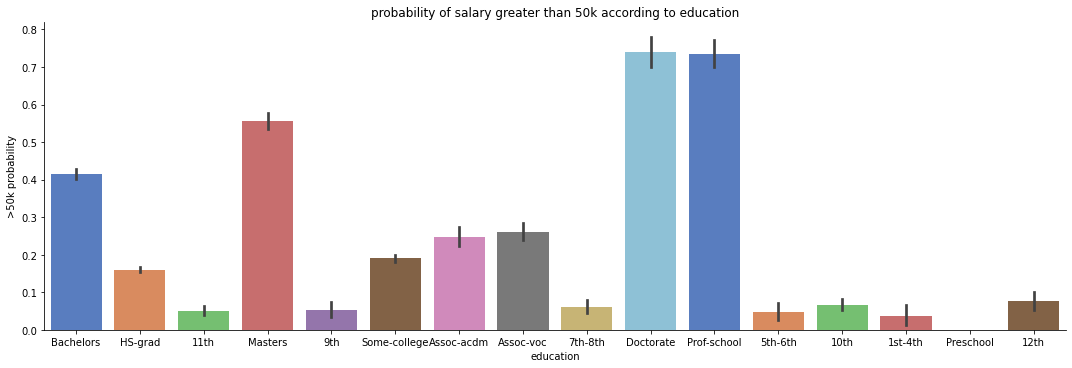

In [40]:
#factor plot of education vs income
sns.factorplot(x='education',y='income',data=df,kind='bar',size=5,palette='muted',aspect=3)
plt.title('probability of salary greater than 50k according to education')
plt.ylabel('>50k probability')
plt.show()

# education_num vs income

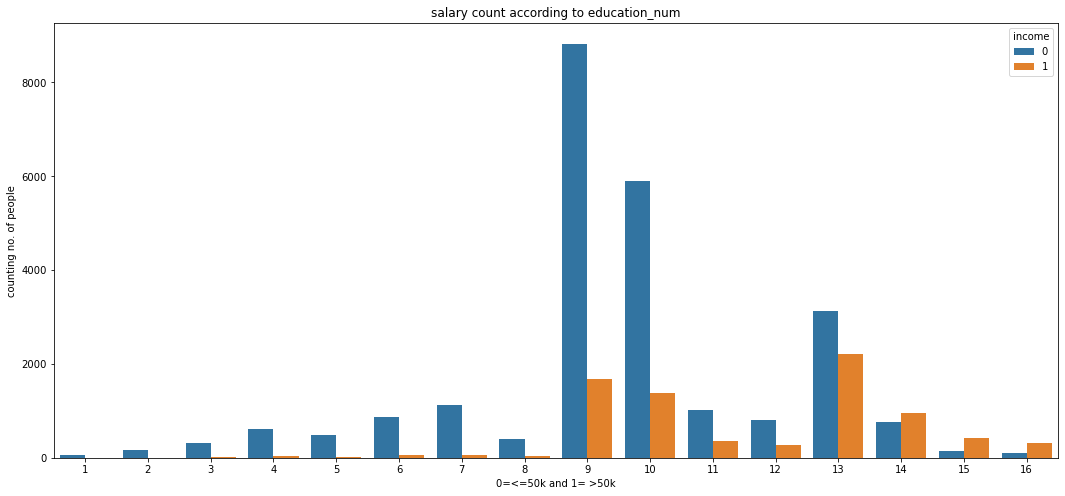

education_num  income
1              0           51
2              0          162
               1            6
3              0          317
               1           16
4              0          606
               1           40
5              0          487
               1           27
6              0          871
               1           62
7              0         1115
               1           60
8              0          400
               1           33
9              0         8826
               1         1675
10             0         5904
               1         1387
11             0         1021
               1          361
12             0          802
               1          265
13             0         3133
               1         2221
14             1          959
               0          764
15             1          423
               0          153
16             1          306
               0          107
Name: income, dtype: int64


In [41]:
plt.subplots(figsize=(18,8))
sns.countplot(x='education_num',hue='income',data=df)
plt.title('salary count according to education_num')
plt.xlabel('0=<=50k and 1= >50k')
plt.ylabel('counting no. of people')
plt.show()

print(df.groupby('education_num')['income'].value_counts())

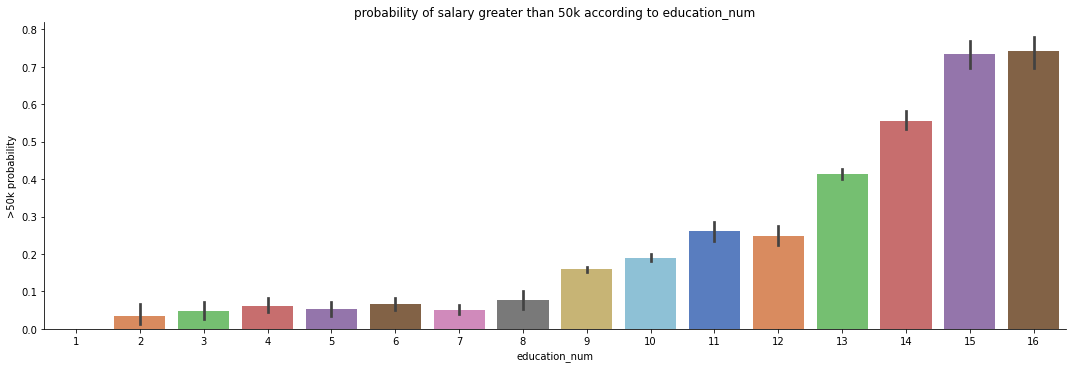

In [42]:
#factor plot of education_num vs income
sns.factorplot(x='education_num',y='income',data=df,kind='bar',size=5,palette='muted',aspect=3)
plt.title('probability of salary greater than 50k according to education_num')
plt.ylabel('>50k probability')
plt.show()

# Relationship vs income

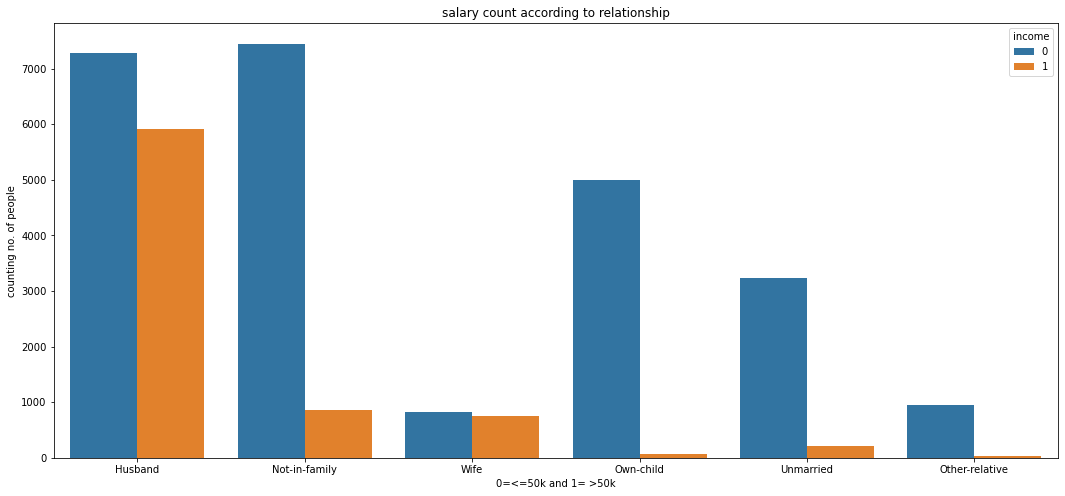

relationship    income
Husband         0         7275
                1         5918
Not-in-family   0         7448
                1          856
Other-relative  0          944
                1           37
Own-child       0         5001
                1           67
Unmarried       0         3228
                1          218
Wife            0          823
                1          745
Name: income, dtype: int64


In [43]:
plt.subplots(figsize=(18,8))
sns.countplot(x='relationship',hue='income',data=df)
plt.title('salary count according to relationship')
plt.xlabel('0=<=50k and 1= >50k')
plt.ylabel('counting no. of people')
plt.show()

print(df.groupby('relationship')['income'].value_counts())

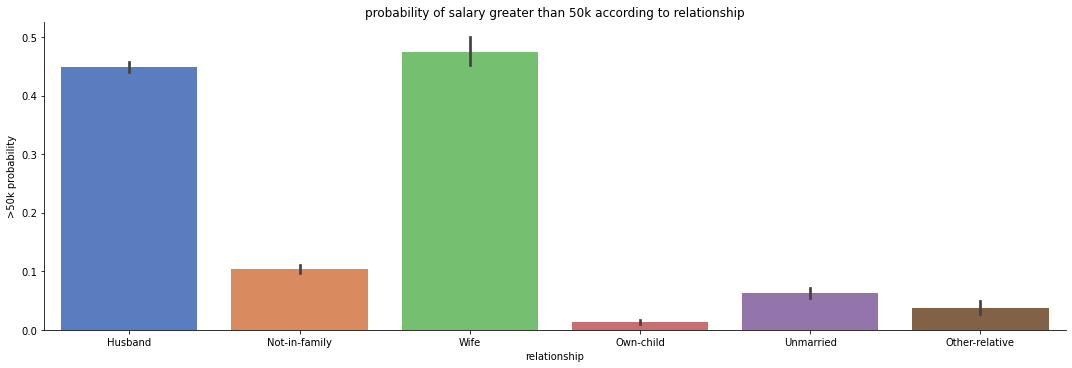

In [44]:
#factor plot of relationship vs income
sns.factorplot(x='relationship',y='income',data=df,kind='bar',size=5,palette='muted',aspect=3)
plt.title('probability of salary greater than 50k according to relationship')
plt.ylabel('>50k probability')
plt.show()

# workclass vs income

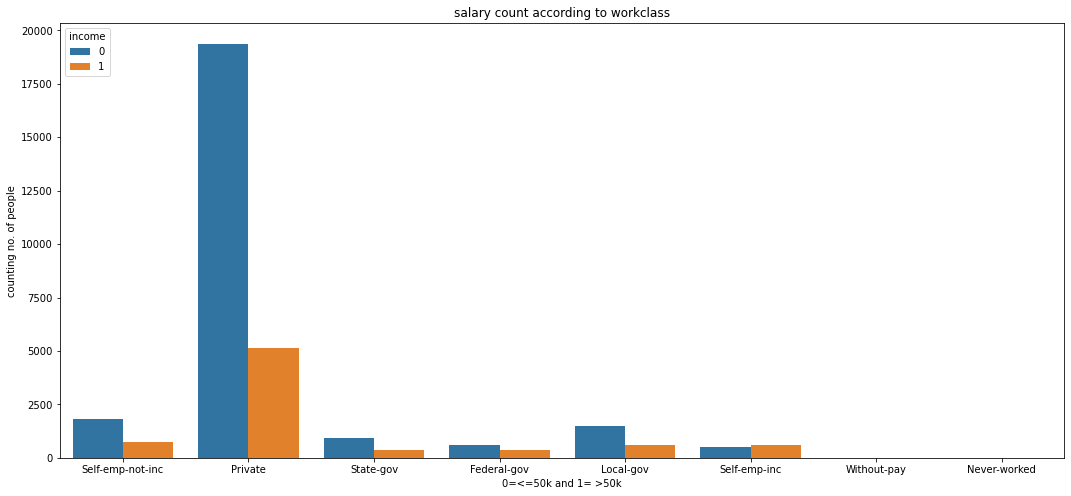

workclass         income
Federal-gov       0           589
                  1           371
Local-gov         0          1476
                  1           617
Never-worked      0             7
Private           0         19378
                  1          5154
Self-emp-inc      1           622
                  0           494
Self-emp-not-inc  0          1817
                  1           724
State-gov         0           944
                  1           353
Without-pay       0            14
Name: income, dtype: int64


In [45]:
plt.subplots(figsize=(18,8))
sns.countplot(x='workclass',hue='income',data=df)
plt.title('salary count according to workclass')
plt.xlabel('0=<=50k and 1= >50k')
plt.ylabel('counting no. of people')
plt.show()

print(df.groupby('workclass')['income'].value_counts())

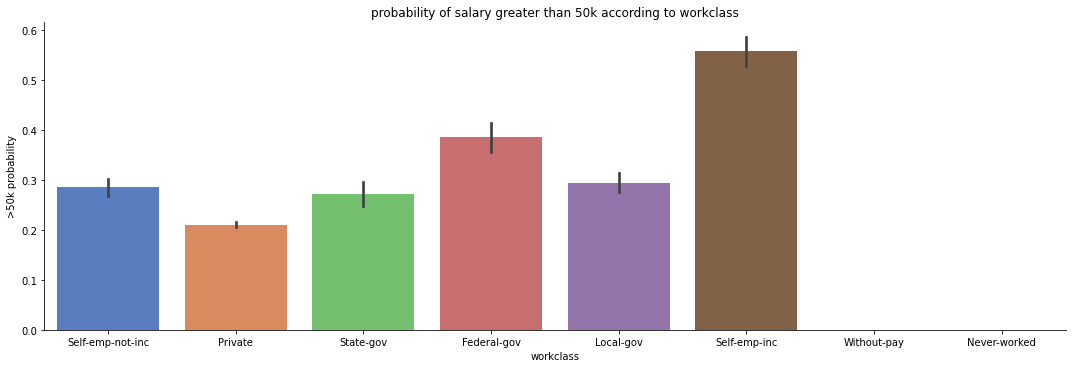

In [46]:
#factor plot of relationship vs income
sns.factorplot(x='workclass',y='income',data=df,kind='bar',size=5,palette='muted',aspect=3)
plt.title('probability of salary greater than 50k according to workclass')
plt.ylabel('>50k probability')
plt.show()

# checking skewness

In [47]:
df.skew()

age                0.558738
fnlwgt             1.446972
education_num     -0.311630
capital_gain      11.953690
capital_loss       4.594549
hours_per_week     0.227636
income             1.212383
dtype: float64

In [48]:
#treating skewness via squareroot method and cube root method
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.55:
            df[col]=np.cbrt(df[col])

In [49]:
#again checking the skewness
df.skew()

age               0.204335
fnlwgt            0.189066
education_num    -0.311630
capital_gain      5.894949
capital_loss      4.376279
hours_per_week    0.227636
income            1.212383
dtype: float64

In [50]:
df.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week      int64
native_country     object
income            float64
dtype: object

# converting categorical data into numerical variables

In [51]:
#transform non numeric column into numeric one
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype==np.number:
        continue
    df[col]=le.fit_transform(df[col])

In [52]:
df.head()

age  workclass      fnlwgt  education  education_num  marital_status  \
0  7.071068          5  288.636450          9             12               2   
1  6.164414          3  464.377002         11              8               0   
2  7.280110          3  484.480134          1              6               2   
3  5.291503          3  581.729318          9             12               2   
4  6.082763          3  533.462276         12             13               2   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           3             0     4    1           0.0           0.0   
1           5             1     4    1           0.0           0.0   
2           5             0     2    1           0.0           0.0   
3           9             5     2    0           0.0           0.0   
4           3             5     4    0           0.0           0.0   

   hours_per_week  native_country  income  
0              12              38     0.0  
1              39              38     0.0  
2              39              38     0.0  
3              39               4     0.0  
4              39              38     0.0

# plotting outliers

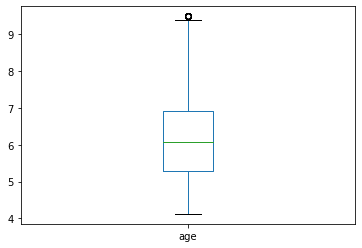

In [53]:
df['age'].plot.box()

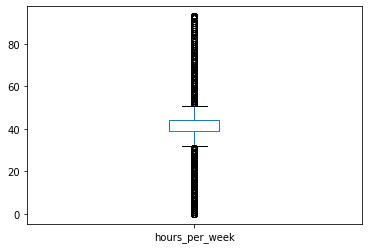

In [54]:
df['hours_per_week'].plot.box()

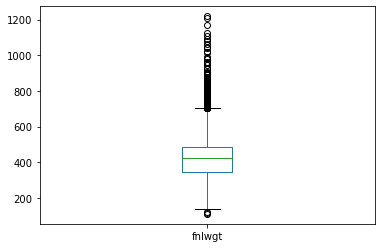

In [55]:
df['fnlwgt'].plot.box()

some outliers are present in our data,which needs to be removed

# removing outliers

In [56]:
from scipy.stats import zscore
z_score=np.abs(zscore(df))
print(df.shape)

df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(32560, 15)
(27561, 15)


outliers have been removed

# model training

In [57]:
#spliting the data into input and output variable
x=df_new.drop('income',axis=1)
x.shape

(27561, 14)

In [58]:
y=df_new['income']
y.shape

(27561,)

In [59]:
df['income'].unique()

array([0., 1.])